In [1]:
'''

load original df

'''

import pandas as pd
import os
import numpy as np
import warnings
warnings.filterwarnings('ignore') #supresses warnings for now
#warnings.filterwarnings(action='once') #shows warnings once


dataFilePath = os.path.join(os.getcwd(),'Data')

#print(os.path.join(dataFilePath,'kics_structural_variations.txt'))


kicsSVdf = pd.read_csv(os.path.join(dataFilePath,'kics_structural_variations.txt'), sep = '\t', header = 0)
#kicsTEdf = pd.read_csv(os.path.join(dataFilePath,'kics_transposable_elements.txt'), sep = '\t', header = 0)
lfsSVdf = pd.read_csv(os.path.join(dataFilePath,'lfs_structural_variations.txt'), sep = '\t', header = 0)
#lfsTEdf = pd.read_csv(os.path.join(dataFilePath,'lfs_transposable_elements.txt'), sep = '\t', header = 0)
kicsClinicdf = pd.read_csv(os.path.join(dataFilePath,'kics_clinical_main.tsv'), sep = '\t', header = 0)
lfsClinicdf = pd.read_csv(os.path.join(dataFilePath,'lfs_clinical_main.tsv'), sep = '\t', header = 0)


In [2]:
"""

filter dfs

"""

kicsSVF = kicsSVdf.loc[kicsSVdf['AnnotSV type'] == 'full']
lfsSVF = lfsSVdf.loc[lfsSVdf['AnnotSV type'] == 'full']

kicsSVF['SV chrom'] = kicsSVF['SV chrom'].astype(str)
lfsSVF['SV chrom'] = lfsSVF['SV chrom'].astype(str)

kicsSVnum = kicsSVF['sample_id'].count()
lfsSVnum = lfsSVF['sample_id'].count()

#print(kicsSVnum, lfsSVnum)

#to improve this, multi-index would be good, that way we can have less columns
mergedSVdf = pd.DataFrame(data = {'kics':kicsSVF['SV type'], 'kChrom':kicsSVF['SV chrom'], 
                                  'kId':kicsSVF['sample_id'], 'lId':lfsSVF['sample_id'],
                                  'lfs':lfsSVF['SV type'], 'lChrom':lfsSVF['SV chrom']})

#print(mergedSVdf.head(30))


In [22]:
"""

1. Graph for frequency of SV types
2. Graphs for frequency of SV types specific to chromosomes

Function to graph bar graphs

"""
from matplotlib import pyplot as plt

def BarGraphNormalized(label1: str, label2:str, df: pd.DataFrame, col1: str, col2: str,
                        xTitle: str, yTitle: str, divisor1: float, divisor2: float,
                        labels: list):
    #'kics', 'lfs', invdf, 'kchrom', 'lchrom', 'Chromosomes','Frequency','Graph2-INV',kicsSVnum, lfsSVnum

    title = label1 + " " + label2
    count1 = df[col1].value_counts()
    count2 = df[col2].value_counts()
    
    x_axis = np.arange(len(labels))
        
    for i in labels:
        if (not(i in count1)):
            add = pd.Series([0], index=[i])
            count1 = count1.append(add)
        if (not(i in count2)):
            add = pd.Series([0], index=[i])
            count2 = count2.append(add)
    
    plt.bar(x_axis - 0.2, [count1[a] for a in labels]/divisor1, 0.4, label = label1)
    plt.bar(x_axis + 0.2, [count2[a] for a in labels]/divisor2, 0.4, label = label2)

    plt.xticks(x_axis, labels)
    plt.xlabel(xTitle)
    plt.ylabel(yTitle)
    plt.title(title)
    plt.legend()
    plt.show()
    
xLabels = ['DEL','DUP','INV']
uniqueLabels = ['1','2','3','4','5','6','7','8','9','10',
                '11','12','13','14','15','16','17','18','19','20','21','22','X','Y']

deldf = mergedSVdf.loc[(mergedSVdf['kics'] == 'DEL') | (mergedSVdf['lfs']=='DEL')]
dupdf = mergedSVdf.loc[(mergedSVdf['kics'] == 'DUP') | (mergedSVdf['lfs']=='DUP')]
invdf = mergedSVdf.loc[(mergedSVdf['kics'] == 'INV') | (mergedSVdf['lfs']=='INV')]

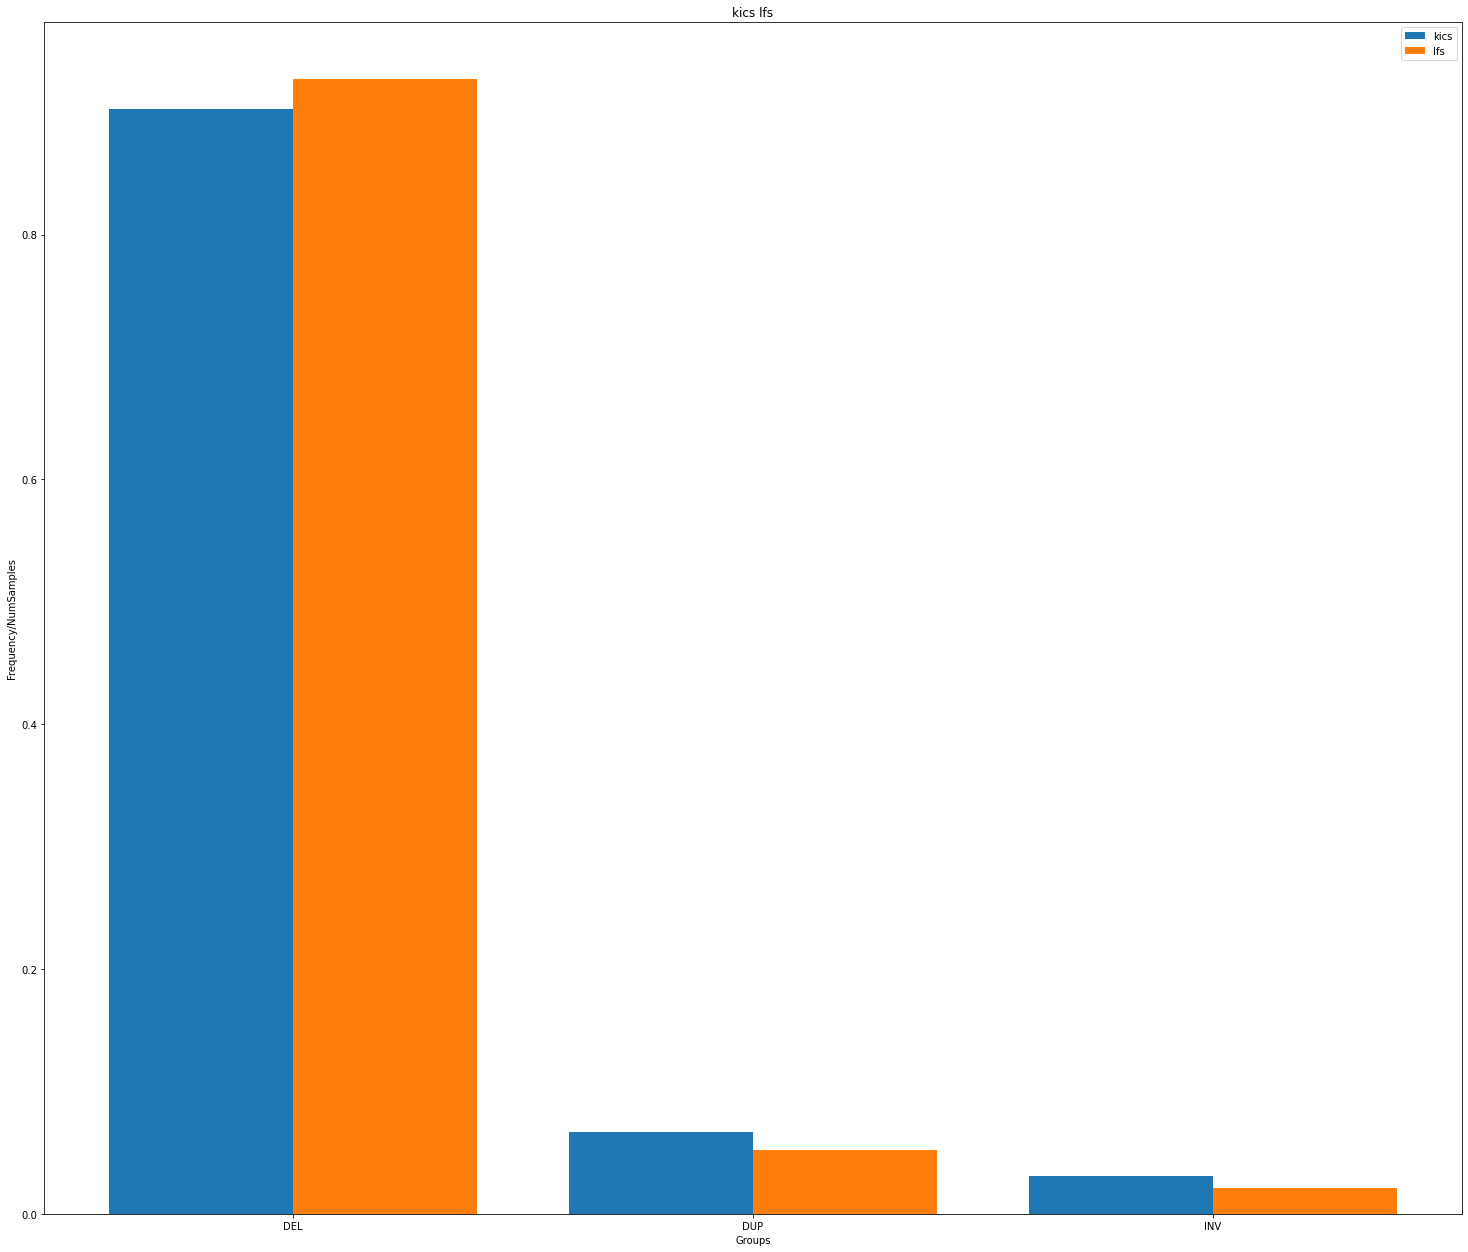

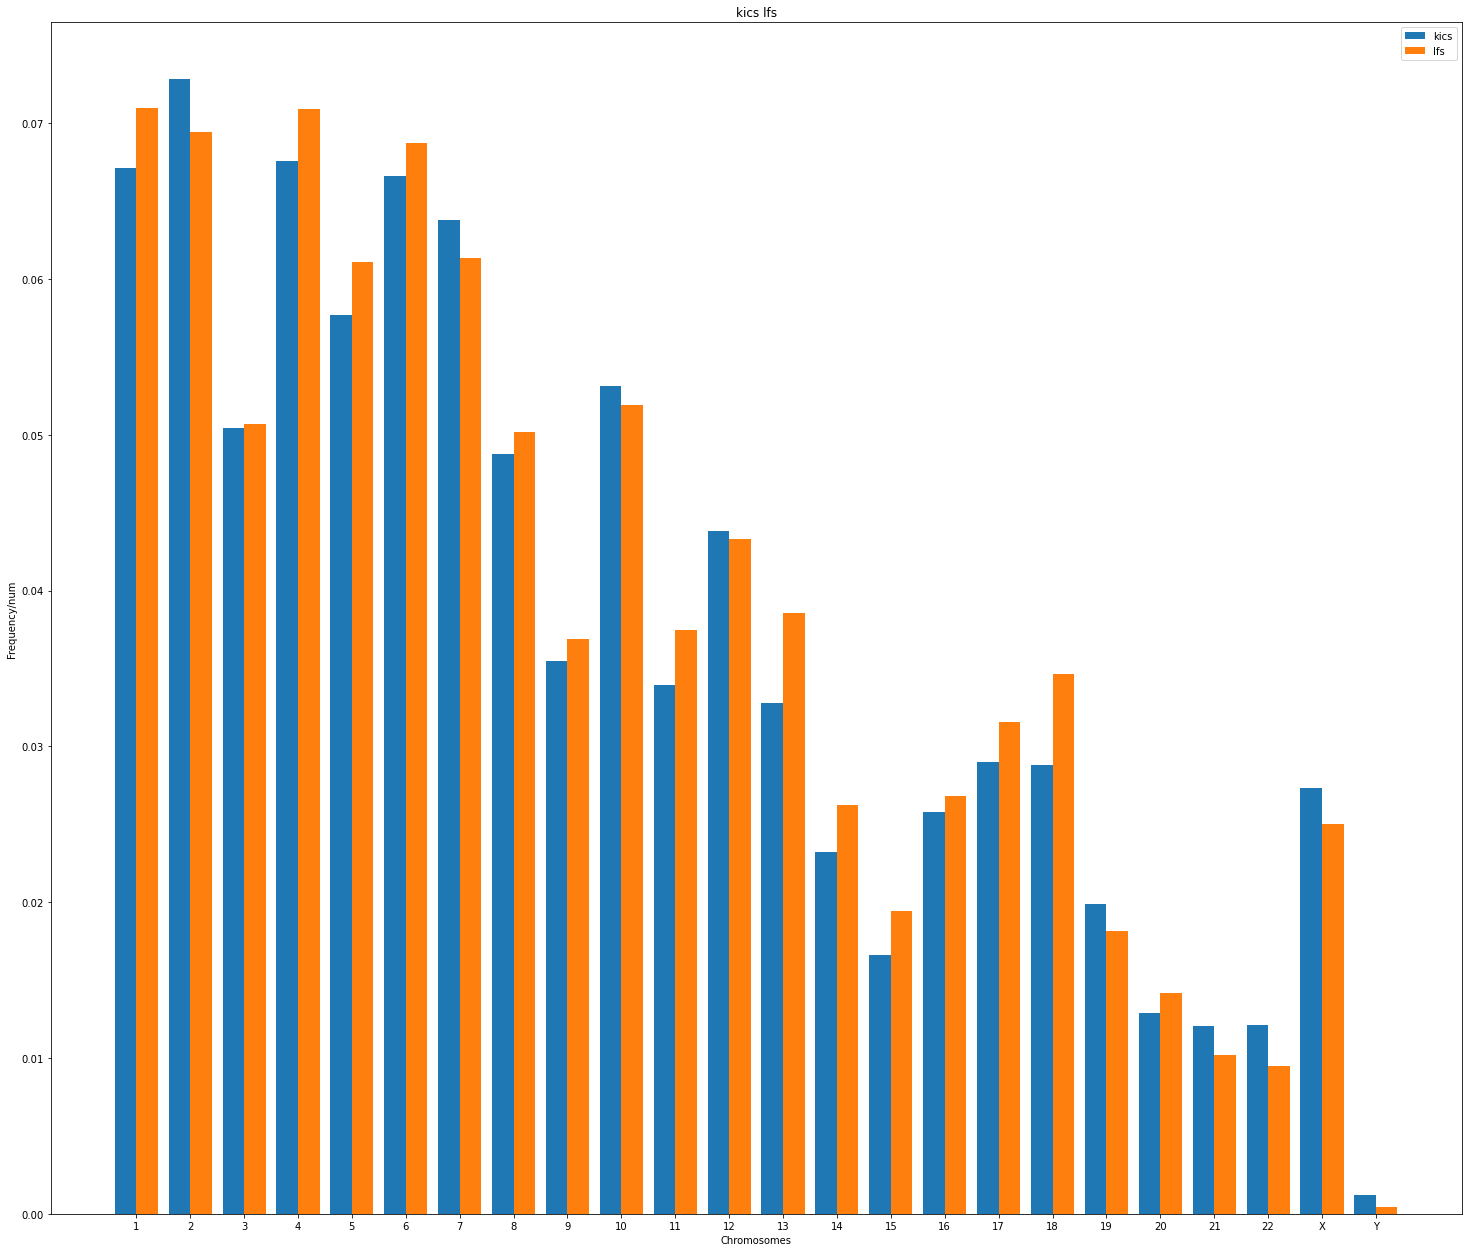

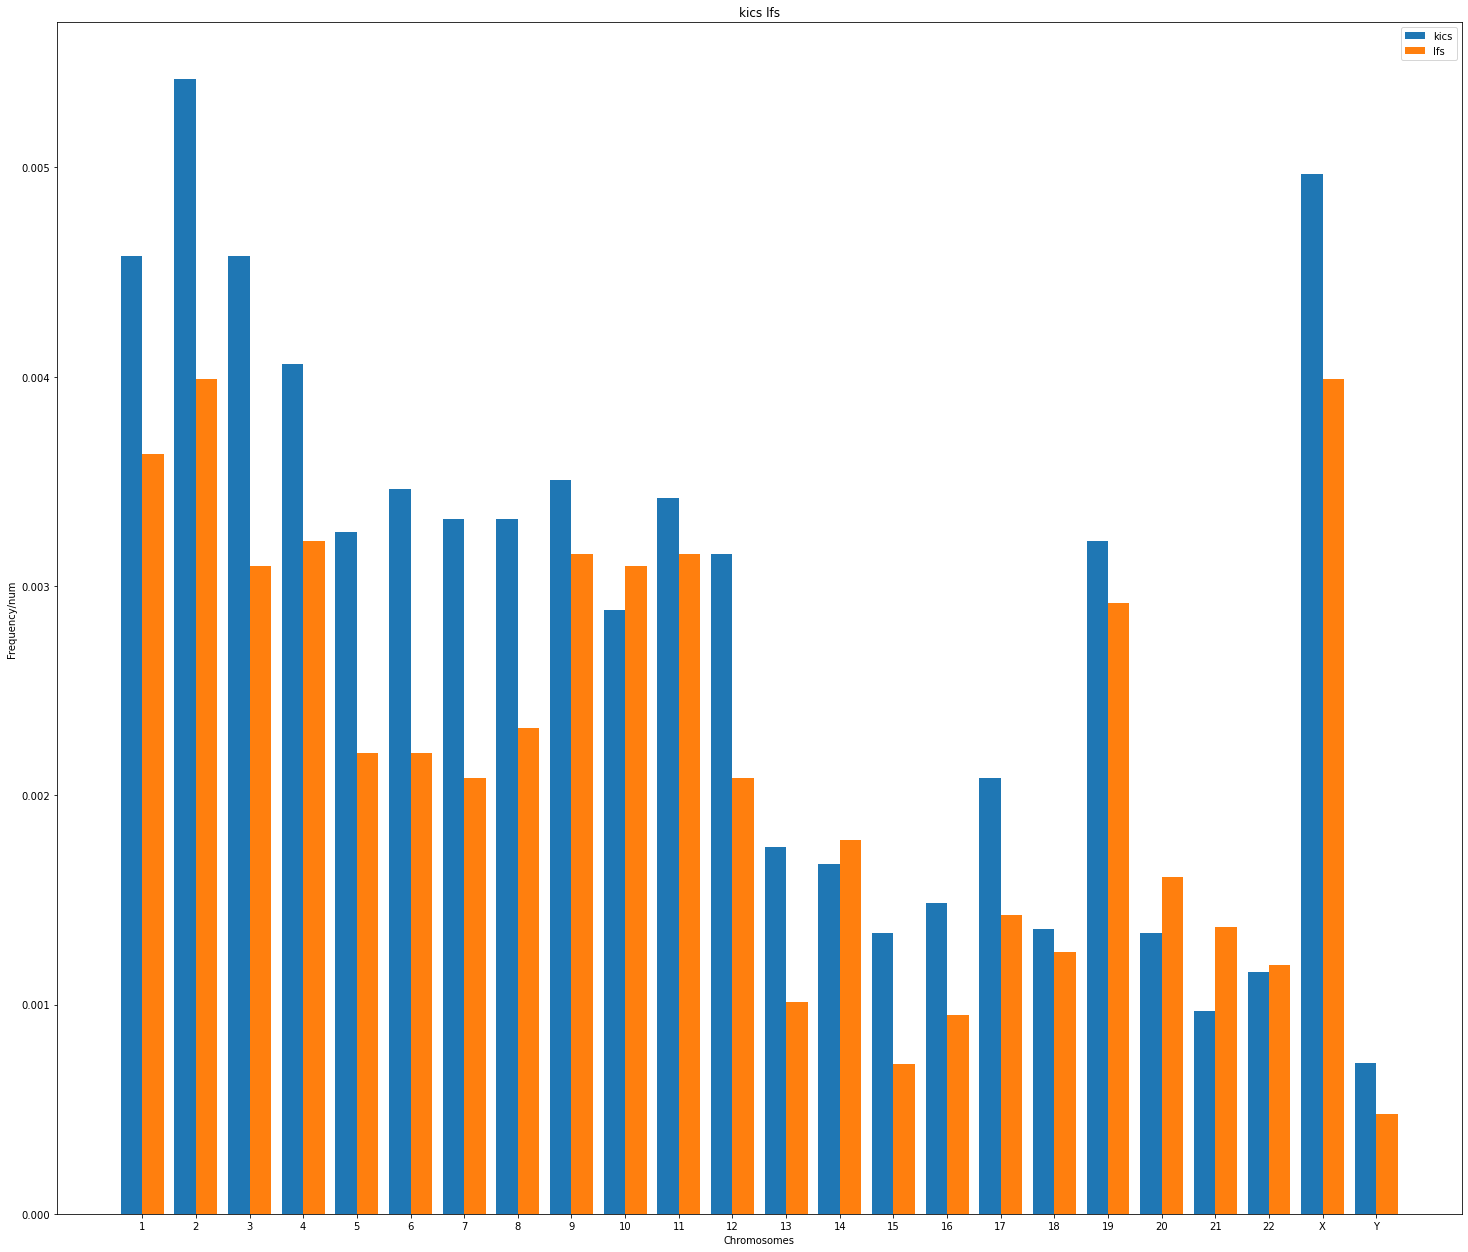

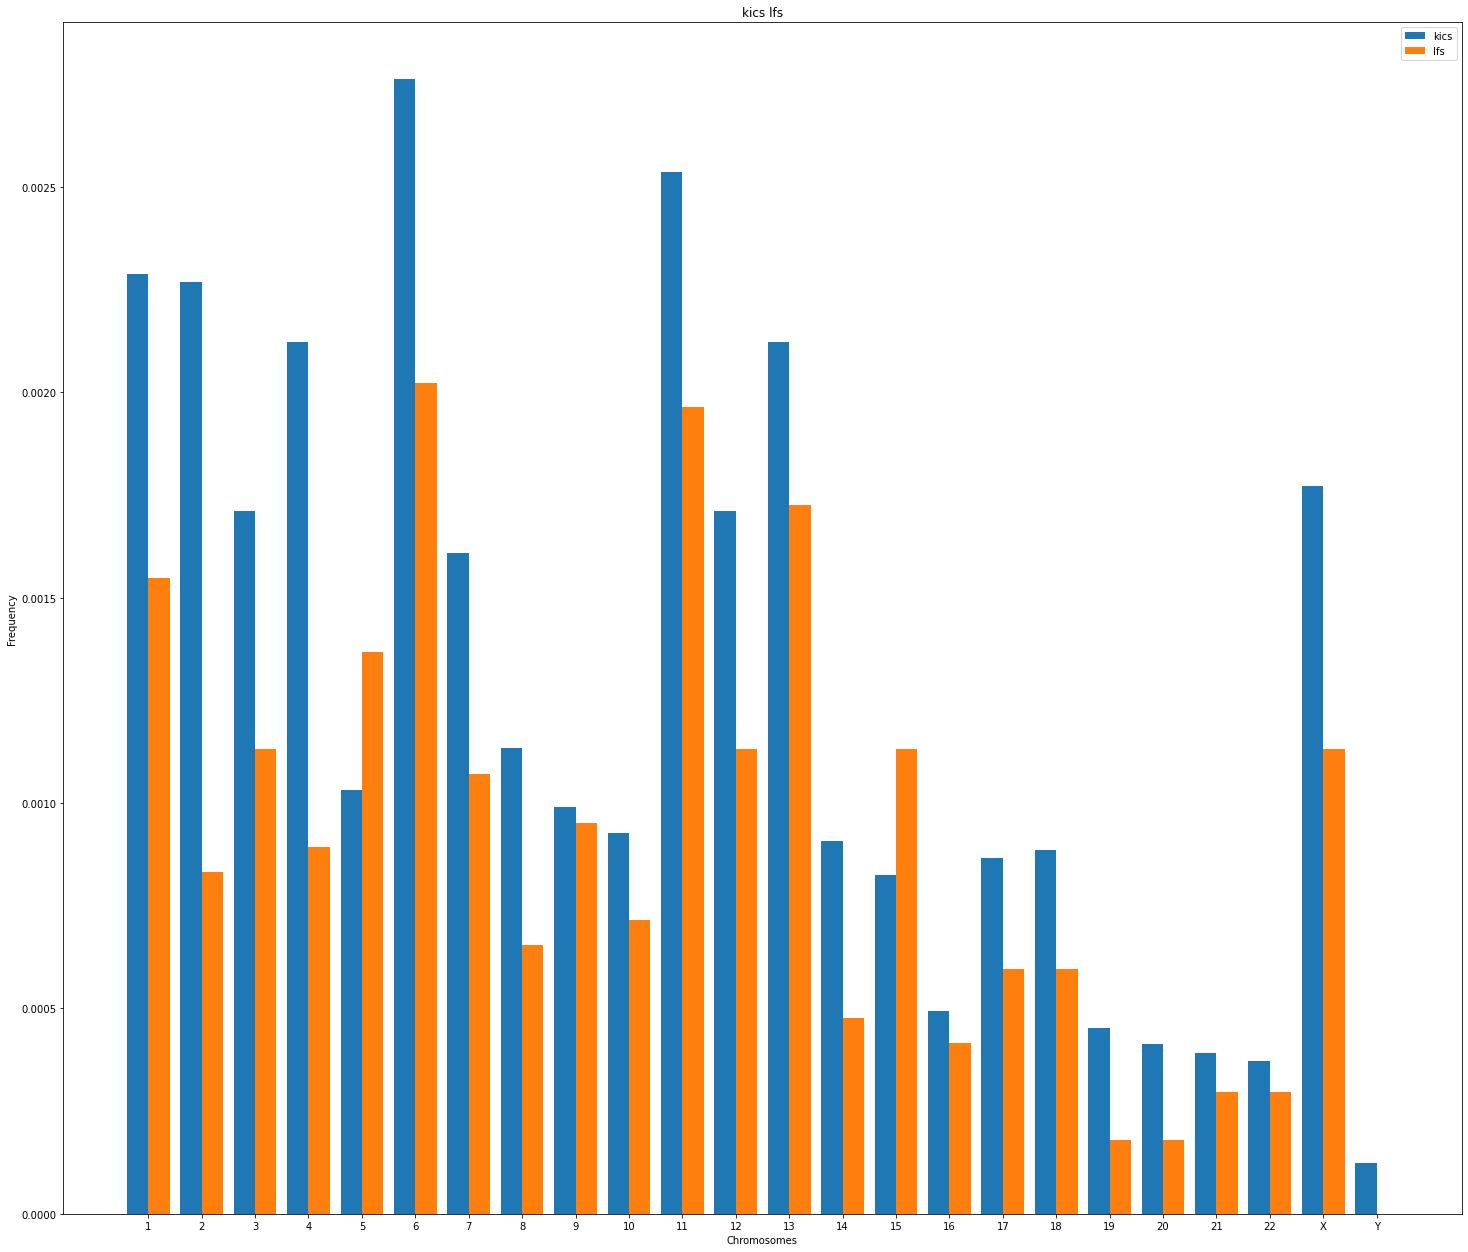

In [23]:
#Overall
BarGraphNormalized('kics', 'lfs', mergedSVdf, 'kics', 'lfs', 'Groups', 'Frequency/NumSamples', 
                   kicsSVnum, lfsSVnum, xLabels)

#Deletions 
BarGraphNormalized('kics', 'lfs', deldf, 'kChrom', 'lChrom', 'Chromosomes', 'Frequency/num', 
                   kicsSVnum, lfsSVnum, uniqueLabels)

#Duplicates
BarGraphNormalized('kics', 'lfs', dupdf, 'kChrom', 'lChrom', 'Chromosomes', 'Frequency/num', 
                   kicsSVnum, lfsSVnum, uniqueLabels)

#Inversions
BarGraphNormalized('kics', 'lfs', invdf, 'kChrom', 'lChrom', 'Chromosomes', 'Frequency', 
                   kicsSVnum, lfsSVnum, uniqueLabels)

In [20]:
"""
filter the df for CDS_length
"""

kicsSVR = kicsSVdf.loc[kicsSVdf['AnnotSV type'] == 'split']
lfsSVR = lfsSVdf.loc[lfsSVdf['AnnotSV type'] == 'split']

mergedCDSdf = pd.DataFrame(data = {'kics':kicsSVR['CDS length'],
                                'lfs':lfsSVR['CDS length']}) 

#boxplotCDS = mergedCDSdf.boxplot(column=['kics','lfs'], showfliers = False)

#print(mergedCDSdf.head(50))
#they look the same?


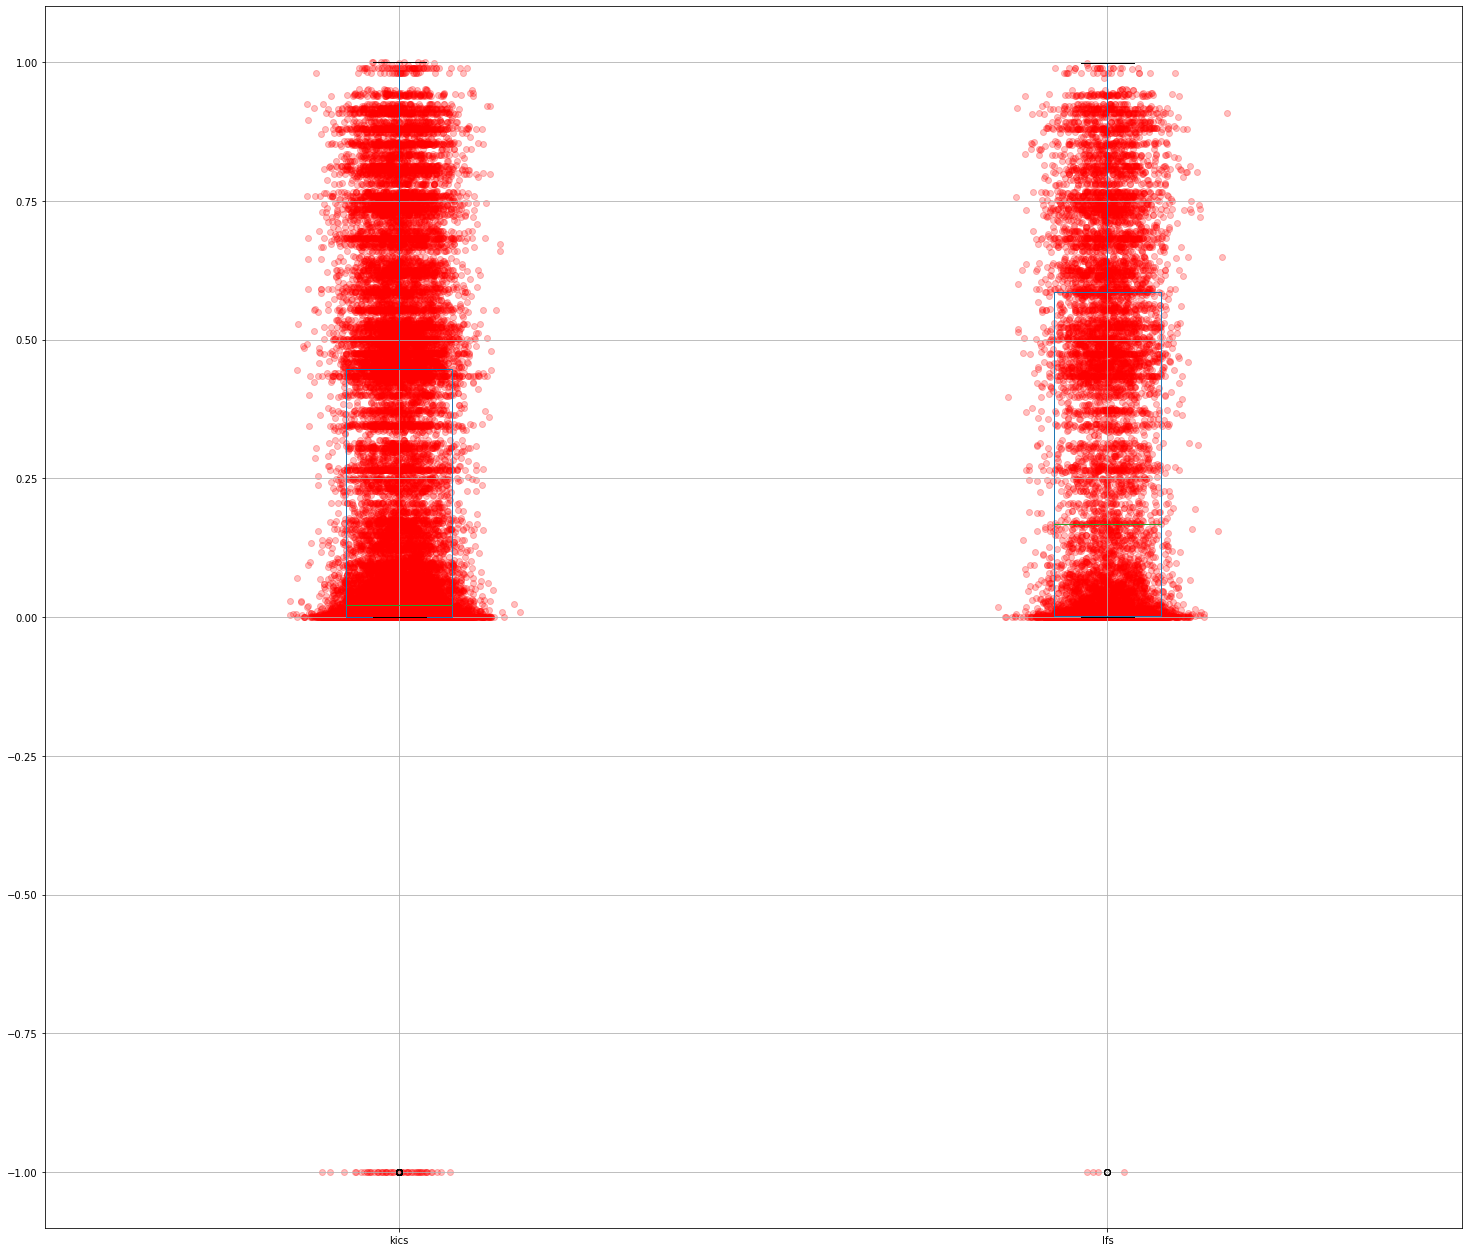

In [9]:
 
global mergedGDAF 
mergedGDAF = pd.DataFrame(data = {'kics':kicsSVF['GD_AF'],
                                'lfs':lfsSVF['GD_AF']})

mergedGDAF.replace(to_replace = [-1], value = np.nan, inplace=True)
mergedGDAF.replace(to_replace = ['-1'], value = np.nan, inplace=True)


def maxGDAFFilter(colName: str, df: pd.DataFrame):
    temp = df[colName].str.contains(pat=',')
    Index = list(np.where(temp == True)[0])
    temp = df[colName].iloc[Index]
    tempIndex = temp.index

    for i in tempIndex:
        tempList = temp[i].split(',')
        tempList = [float(a) for a in tempList]
        maxTemp = max(tempList)
        df[colName][i] = maxTemp

    df[colName] = df[colName].astype('float64')
    
maxGDAFFilter('kics', mergedGDAF)
maxGDAFFilter('lfs', mergedGDAF)


def boxplotPoints(title:list, column:list, df: pd.DataFrame , sizeH=20.50, sizeV=17.50, col='red', trans=0.25):
    plt.rcParams["figure.figsize"] = [sizeH, sizeV]
    plt.rcParams["figure.autolayout"] = True
    data = pd.DataFrame({
        t: df[c] for t,c in zip(title, column)})
    data.boxplot()
    for i, d in enumerate(data):
       y = data[d]
       x = np.random.normal(i + 1, 0.04, len(y))
       plt.scatter(x, y, color = col, alpha = trans)
    plt.show()

titles = ['kics','lfs']
columns = titles

boxplotPoints(titles, columns, mergedGDAF)




In [ ]:
"""

Testing group by

"""
#probably a better way to do this

kicsSVdf = pd.DataFrame(data = {'kics':kicsSVF['SV type'], 
                                  'kId':kicsSVF['sample_id']})
lfsSVdf = pd.DataFrame(data = {'lId':lfsSVF['sample_id'],
                                  'lfs':lfsSVF['SV type']})

#temp = mergedSVdf.groupby(['kId']).value_counts() #not sure how to use this

##kics
ktemp = kicsSVdf.groupby(['kId']).value_counts()

##lfs
ltemp = lfsSVdf.groupby(['lId']).value_counts()

print(ktemp.to_frame())

ktempDEL = ktemp[ktemp['kics'] == 'DEL']
print(ktempDEL.head(50))



boxplot = mergedGDAF.boxplot(column=['kics','lfs'])
